In [1]:
import pandas as pd
data=pd.read_csv('fatal-police-shootings-data.csv')
data
        

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False


In [85]:
grpd2 = data.groupby(['race','signs_of_mental_illness']).size().reset_index(name='Total')
grpd2['Totalrace'] = grpd2.groupby(['race'])['Total'].transform('sum')
grpd2





,race,signs_of_mental_illness,Total,Totalrace
0,A,False,69,93
1,A,True,24,93
2,B,False,1114,1298
3,B,True,184,1298
4,H,False,745,902
5,H,True,157,902
6,N,False,64,78
7,N,True,14,78
8,O,False,37,48
9,O,True,11,48


In [87]:
grpd2['Percentage'] =grpd2['Total'].apply(lambda x: (x / grpd2['Totalrace'].sum()) * 100)
grpd2

,race,signs_of_mental_illness,Total,Totalrace,Percentage
0,A,False,69,93,0.704801
1,A,True,24,93,0.245148
2,B,False,1114,1298,11.378958
3,B,True,184,1298,1.879469
4,H,False,745,902,7.609806
5,H,True,157,902,1.603677
6,N,False,64,78,0.653728
7,N,True,14,78,0.143003
8,O,False,37,48,0.377937
9,O,True,11,48,0.112360


Jak rozmawialiśmy na spotkaniu, nie widzę dlaczego używając apply (powyżej), wynik nieznacznie różni się od prawidłowego.
Prawidłowy wynik znajduje się poniżej

In [92]:
grpd2['Percentage_of_mental_illness'] = grpd2.apply(lambda row: (row['Total'] / row['Totalrace']) * 100 if row['Totalrace'] != 0 else 0, axis=1)
grpd2

,race,signs_of_mental_illness,Total,Totalrace,Percentage,Percentage_of_mental_illness
0,A,False,69,93,0.741935,74.193548
1,A,True,24,93,0.258065,25.806452
2,B,False,1114,1298,0.858243,85.824345
3,B,True,184,1298,0.141757,14.175655
4,H,False,745,902,0.825942,82.594235
5,H,True,157,902,0.174058,17.405765
6,N,False,64,78,0.820513,82.051282
7,N,True,14,78,0.179487,17.948718
8,O,False,37,48,0.770833,77.083333
9,O,True,11,48,0.229167,22.916667


In [107]:
df2 = grpd2.join(df1)
df2


,race,signs_of_mental_illness,Total,Totalrace,Percentage,Percentage_of_mental_illness,date
0,A,False,69,93,0.741935,74.193548,2015-01-02
1,A,True,24,93,0.258065,25.806452,2015-01-02
2,B,False,1114,1298,0.858243,85.824345,2015-01-03
3,B,True,184,1298,0.141757,14.175655,2015-01-04
4,H,False,745,902,0.825942,82.594235,2015-01-04
5,H,True,157,902,0.174058,17.405765,2015-01-04
6,N,False,64,78,0.820513,82.051282,2015-01-05
7,N,True,14,78,0.179487,17.948718,2015-01-06
8,O,False,37,48,0.770833,77.083333,2015-01-06
9,O,True,11,48,0.229167,22.916667,2015-01-06


In [168]:
data['day_of_week']=pd.to_datetime(data['date'])

data


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,day_of_week,date_dt
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday,2015-01-02
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday,2015-01-02
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday,2015-01-03
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday,2015-01-04
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday,2015-01-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False,Saturday,2020-06-13
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False,Saturday,2020-06-13
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False,Monday,2020-06-15
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False,Tuesday,2020-06-16


In [169]:
data['day_of_week']= data['day_of_week'].dt.day_name()
data




,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,day_of_week,date_dt,weekday
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday,2015-01-02,4
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday,2015-01-02,4
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday,2015-01-03,5
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday,2015-01-04,6
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday,2015-01-04,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False,Saturday,2020-06-13,5
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False,Saturday,2020-06-13,5
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False,Monday,2020-06-15,0
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False,Tuesday,2020-06-16,1


In [176]:
days = data.groupby(['day_of_week']).size().reset_index(name='incidents_per_day')
days


,day_of_week,incidents_per_day
0,Monday,726
1,Tuesday,816
2,Wednesday,829
3,Thursday,810
4,Friday,761
5,Saturday,721
6,Sunday,753


,day_of_week,weekday,incidents_per_day
0,Monday,0,726
21,Thursday,0,0
28,Friday,0,0
42,Sunday,0,0
7,Tuesday,0,0
35,Saturday,0,0
14,Wednesday,0,0
1,Monday,1,0
29,Friday,1,0
43,Sunday,1,0


In [179]:
from pandas.api.types import CategoricalDtype

weekday = CategoricalDtype(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
df['day_of_week'] = days['day_of_week'].astype(weekday)
days.sort_values(by='day_of_week')


,day_of_week,incidents_per_day
0,Monday,726
1,Tuesday,816
2,Wednesday,829
3,Thursday,810
4,Friday,761
5,Saturday,721
6,Sunday,753


<Axes: xlabel='day_of_week'>

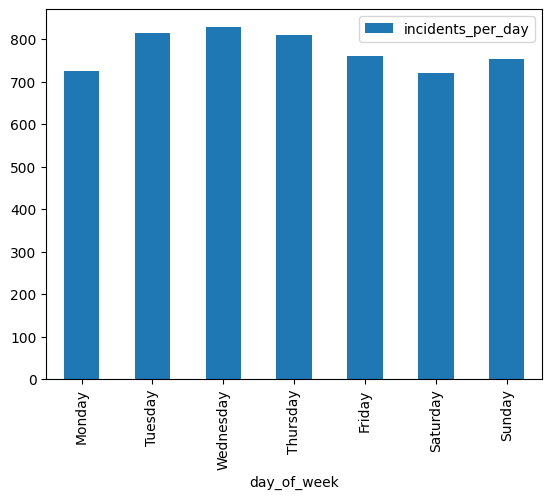

In [181]:
graph = days.plot.bar(x='day_of_week', y='incidents_per_day')
graph

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,day_of_week
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False,Saturday
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False,Saturday
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False,Monday
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False,Tuesday


In [203]:
population = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population', header=0)
population[0]
people = pd.DataFrame(population[0])
people

,"Rank in states & territories, 2020","Rank in states & territories, 2010",State,"Census population, April 1, 2020 [1][2]","Census population, April 1, 2010 [1][2]","Percent change, 2010–2020 [note 1]","Absolute change, 2010-2020","Total seats in the U.S. House of Representatives, 2023–2033",Census population per electoral vote [note 2],Census population per House seat,"Percent of the total U.S. population, 2020 [note 3]"
0,1.0,1.0,California,39538223,37253956,6.1%,+2284267,52,732189,760350,11.80%
1,2.0,2.0,Texas,29145505,25145561,15.9%,+3999944,38,728638,766987,8.70%
2,3.0,4.0,Florida,21538187,18801310,14.6%,+2736877,28,717940,769221,6.43%
3,4.0,3.0,New York,20201249,19378102,4.2%,+823147,26,721473,776971,6.03%
4,5.0,6.0,Pennsylvania,13002700,12702379,2.4%,+300321,17,684353,764865,3.88%
5,6.0,5.0,Illinois,12812508,12830632,−0.1%,"−18,124",17,674343,753677,3.82%
6,7.0,7.0,Ohio,11799448,11536504,2.3%,+262944,15,694085,786630,3.52%
7,8.0,9.0,Georgia,10711908,9687653,10.6%,+1024255,14,669494,765136,3.20%
8,9.0,10.0,North Carolina,10439388,9535483,9.5%,+903905,14,652462,745671,3.12%
9,10.0,8.0,Michigan,10077331,9883640,2.0%,+193691,13,671822,775179,3.01%


In [202]:
abbreviation = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_traditional_abbreviation')
abbreviation[0]
states = pd.DataFrame(abbreviation[0])
states.dtypes
states


,State,Traditional abbreviation,Other abbreviations
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA
5,Colorado,Colo.,CO
6,Connecticut,Conn.,CT
7,Delaware,Del.,DE
8,District of Columbia,D.C.,DC
9,Florida,Fla.,FL


In [214]:
people2 = people[['State','Census population, April 1, 2020 [1][2]']]
people2

,State,"Census population, April 1, 2020 [1][2]"
0,California,39538223
1,Texas,29145505
2,Florida,21538187
3,New York,20201249
4,Pennsylvania,13002700
5,Illinois,12812508
6,Ohio,11799448
7,Georgia,10711908
8,North Carolina,10439388
9,Michigan,10077331


In [229]:
data2= data.groupby(['state']).size().reset_index(name='Total per state')
data2


,state,Total per state
0,AK,39
1,AL,104
2,AR,83
3,AZ,254
4,CA,799
5,CO,195
6,CT,21
7,DC,13
8,DE,13
9,FL,350


In [235]:
#df4 = states.merge(data2, how='right').merge(people2, how='right')

df4 = states.merge(data2, left_on='Other abbreviations', right_on='state').merge(people2, left_on='State', right_on='State')

#pd.merge(states, data2, how="inner", on=["Other abbreviations", "state"])
df4



,State,Traditional abbreviation,Other abbreviations,state,Total per state,"Census population, April 1, 2020 [1][2]"
0,Alabama,Ala.,AL,AL,104,5024279
1,Alaska,Alaska,AK,AK,39,733391
2,Arizona,Ariz.,AZ,AZ,254,7151502
3,Arkansas,Ark.,AR,AR,83,3011524
4,California,Calif.,CA,CA,799,39538223
5,Colorado,Colo.,CO,CO,195,5773714
6,Connecticut,Conn.,CT,CT,21,3605944
7,Delaware,Del.,DE,DE,13,989948
8,District of Columbia,D.C.,DC,DC,13,689545
9,Florida,Fla.,FL,FL,350,21538187


In [237]:
df4['Total per 1000 citizens'] = df4.apply(lambda row: (row['Total per state'] / row['Census population, April 1, 2020 [1][2]']) * 100 , axis=1)
df4

,State,Traditional abbreviation,Other abbreviations,state,Total per state,"Census population, April 1, 2020 [1][2]",Total per 1000 citizens
0,Alabama,Ala.,AL,AL,104,5024279,0.002070
1,Alaska,Alaska,AK,AK,39,733391,0.005318
2,Arizona,Ariz.,AZ,AZ,254,7151502,0.003552
3,Arkansas,Ark.,AR,AR,83,3011524,0.002756
4,California,Calif.,CA,CA,799,39538223,0.002021
5,Colorado,Colo.,CO,CO,195,5773714,0.003377
6,Connecticut,Conn.,CT,CT,21,3605944,0.000582
7,Delaware,Del.,DE,DE,13,989948,0.001313
8,District of Columbia,D.C.,DC,DC,13,689545,0.001885
9,Florida,Fla.,FL,FL,350,21538187,0.001625
